# Project - Regression Modeling with the Ames Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Ames Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'ames.csv' as a pandas dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
ames = pd.read_csv('ames.csv')

subset = ['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
          'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual', 'LotArea', 'SalePrice']

data = ames.loc[:, subset]

The columns in the Ames housing data represent the dependent and independent variables. We have taken a subset of all columns available to focus on feature interpretation rather than preprocessing steps. The dependent variable here is the sale price of a house `SalePrice`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

### Inspect the columns of the dataset and comment on type of variables present

In [8]:
# Your code here
display(data.head())
display(data.columns)
data.info()

,YrSold,MoSold,Fireplaces,TotRmsAbvGrd,GrLivArea,FullBath,YearRemodAdd,YearBuilt,OverallCond,OverallQual,LotArea,SalePrice
0,2008,2,0,8,1710,2,2003,2003,5,7,8450,208500
1,2007,5,1,6,1262,2,1976,1976,8,6,9600,181500
2,2008,9,1,6,1786,2,2002,2001,5,7,11250,223500
3,2006,2,1,7,1717,1,1970,1915,5,7,9550,140000
4,2008,12,1,9,2198,2,2000,2000,5,8,14260,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YrSold        1460 non-null   int64
 1   MoSold        1460 non-null   int64
 2   Fireplaces    1460 non-null   int64
 3   TotRmsAbvGrd  1460 non-null   int64
 4   GrLivArea     1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   YearRemodAdd  1460 non-null   int64
 7   YearBuilt     1460 non-null   int64
 8   OverallCond   1460 non-null   int64
 9   OverallQual   1460 non-null   int64
 10  LotArea       1460 non-null   int64
 11  SalePrice     1460 non-null   int64
dtypes: int64(12)
memory usage: 137.0 KB


Index(['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
       'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual',
       'LotArea', 'SalePrice'],
      dtype='object')

In [3]:
# Record your observations here 
#sale price could have dependence on many of these numerical values

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

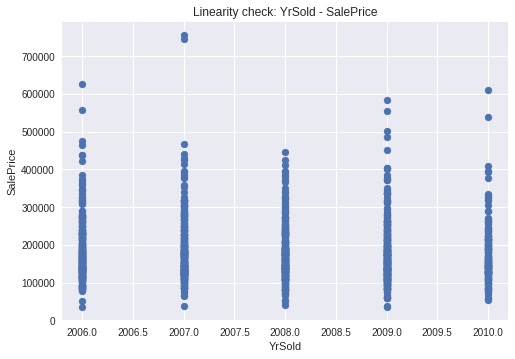

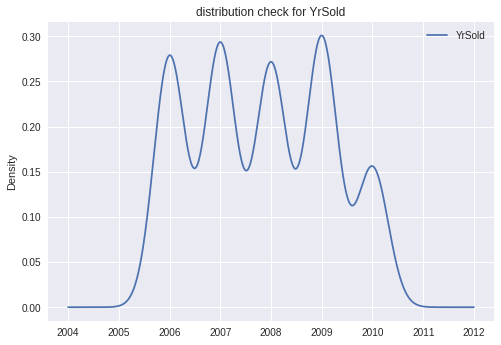

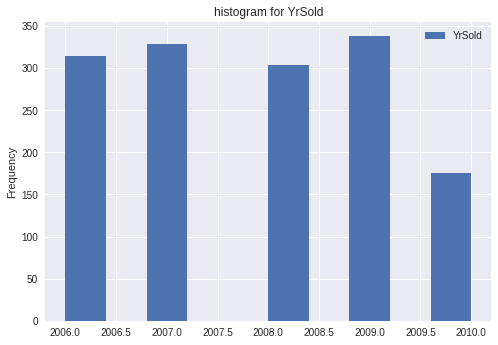

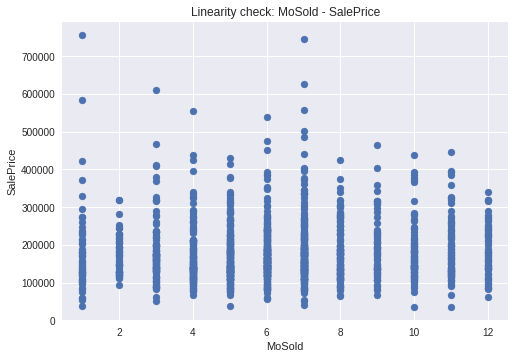

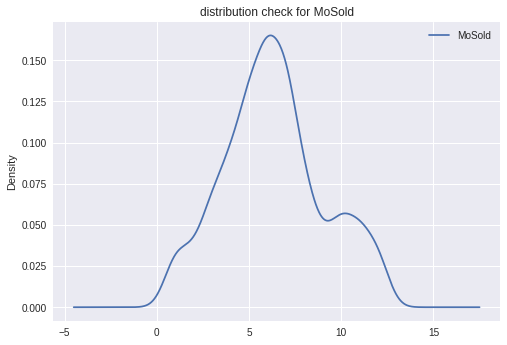

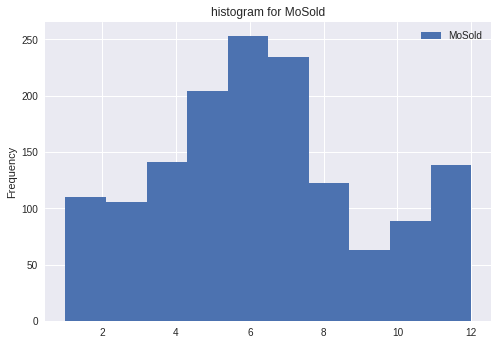

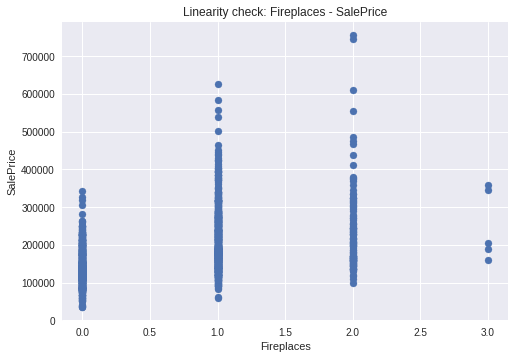

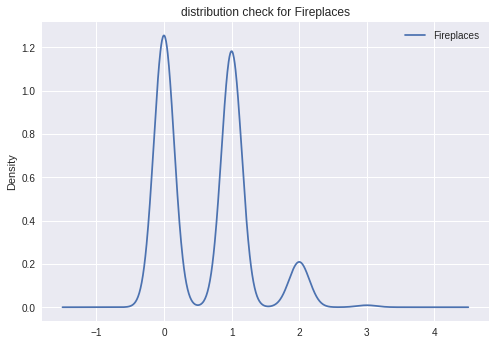

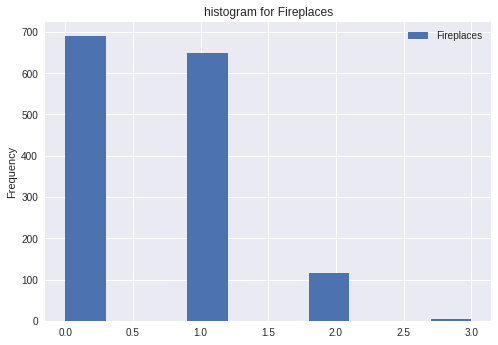

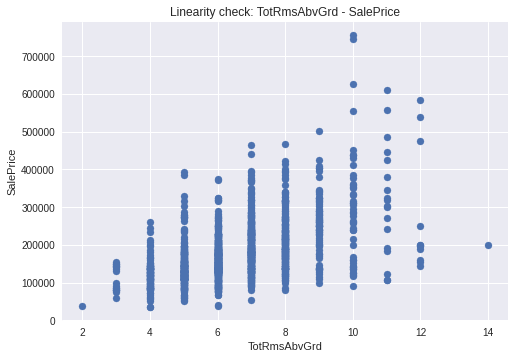

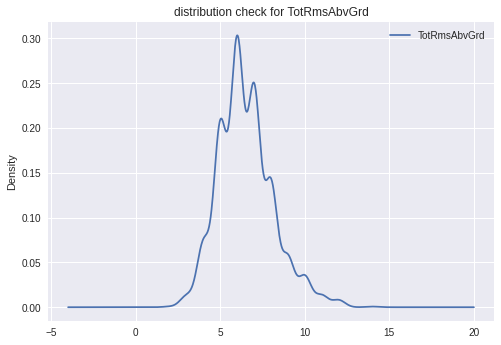

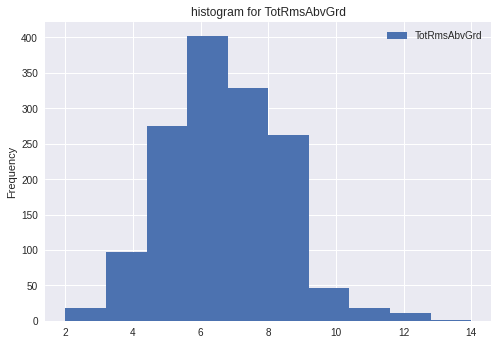

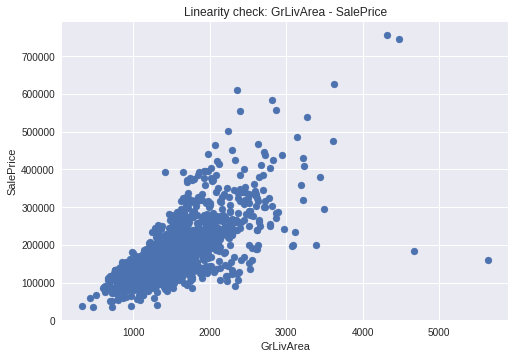

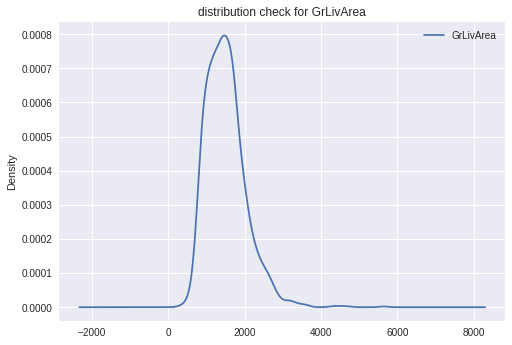

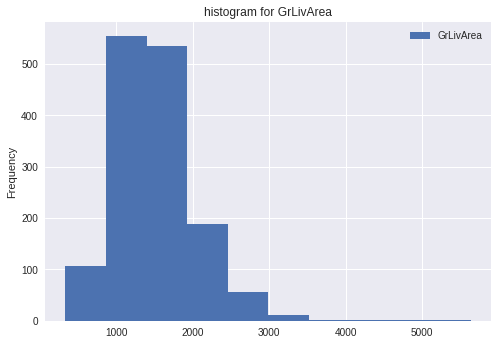

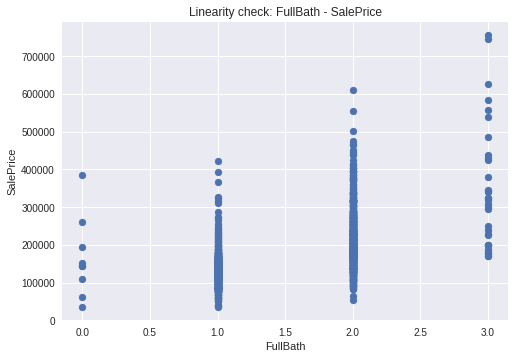

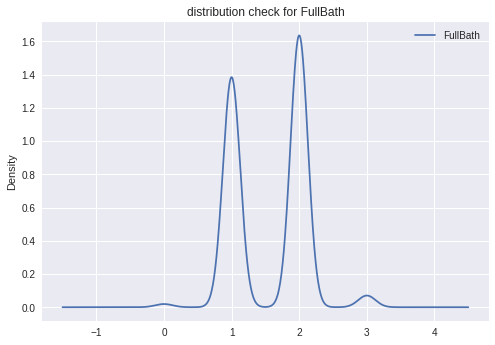

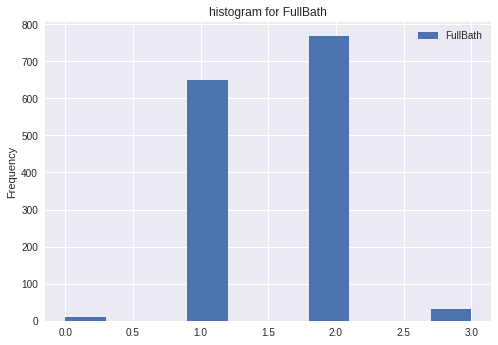

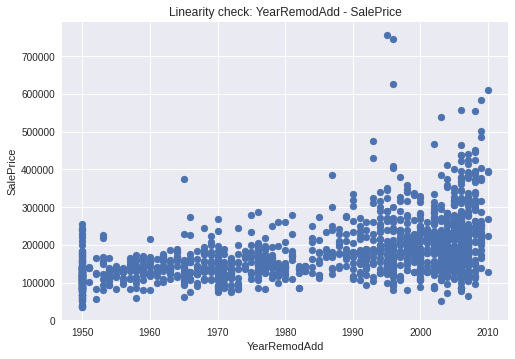

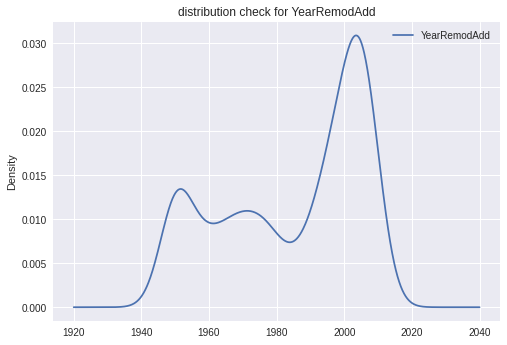

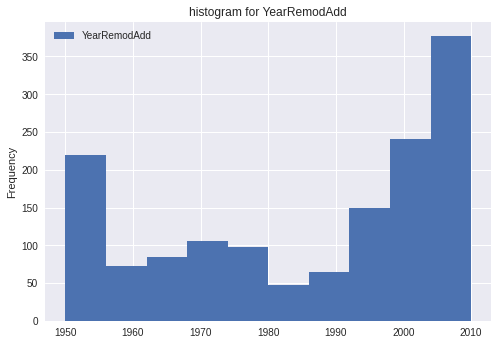

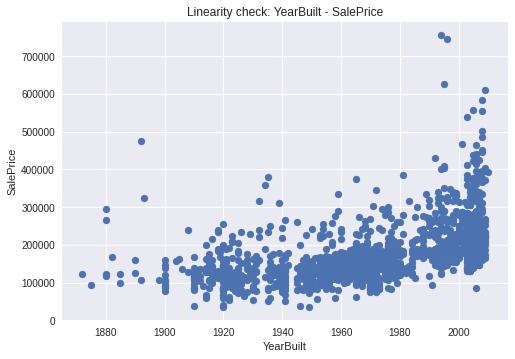

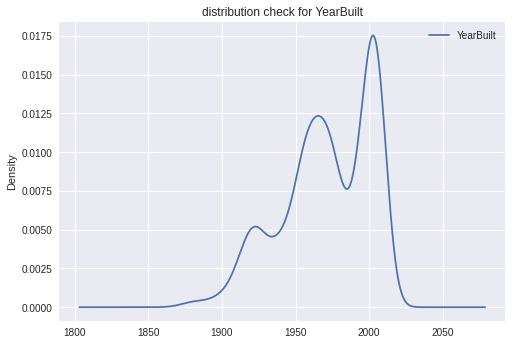

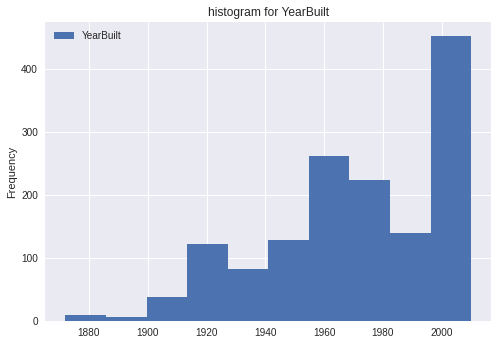

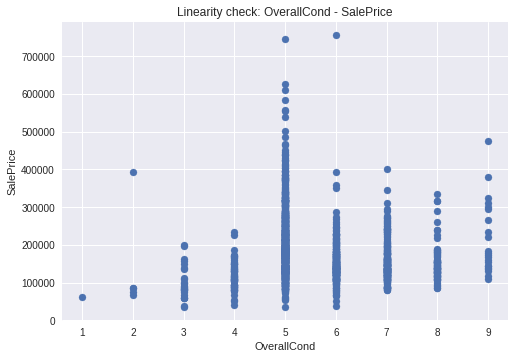

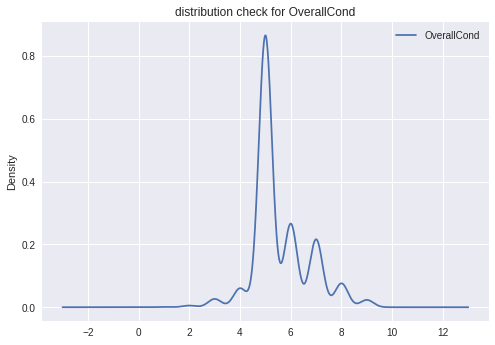

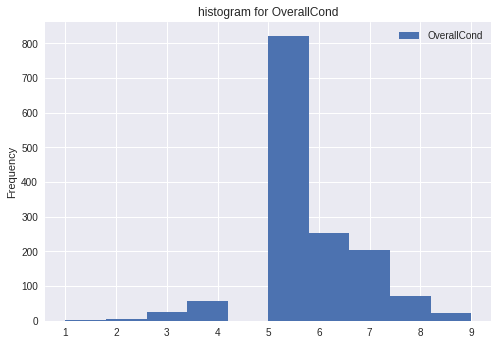

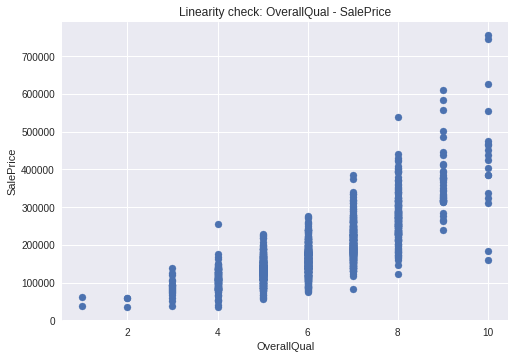

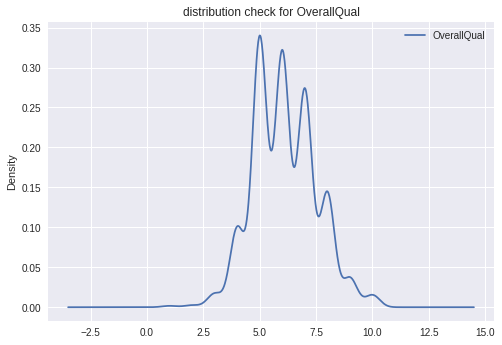

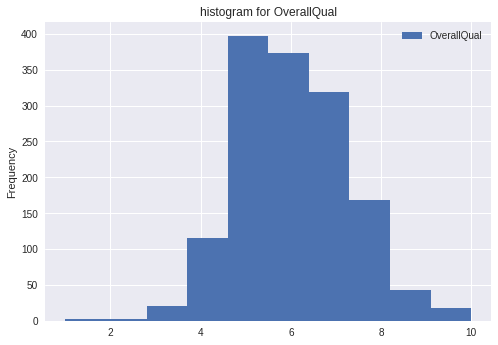

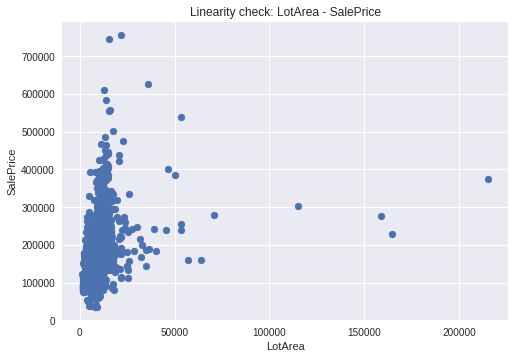

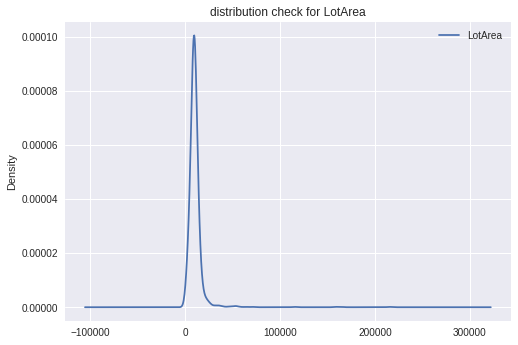

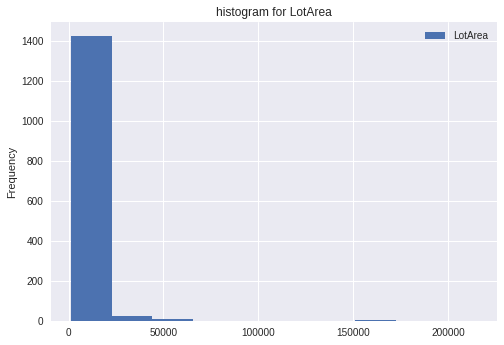

In [24]:
# Your code here 
dep='SalePrice'
for col in data.columns:
    if col==dep:
        continue
    #check linearity
#    df = pd.read_csv('heightWeight.csv')
    plt.scatter(data[col], data[dep])
    plt.title("Linearity check: {} - {}".format(col, dep))
    plt.xlabel(col)
    plt.ylabel(dep)
    plt.show()

    #get a general sense of distribution- not sufficient to assume normality here!!!
    #df=data[[col, dep]]
    df=data[[col]]
    #display(df)
    df.plot.kde()
    plt.title("distribution check for {}".format(col))
    plt.show()
    
    df.plot.hist()
    plt.title('histogram for {}'.format(col))
    plt.show()

In [25]:
# You observations here 
#there are some distributions which seem to have outliers, probably erroneous values.
#There are some which are normal-like, and some that aren't.

### Check the linearity assumption for all chosen features with target variable using scatter plots

In [ ]:
# Your code here 
#done above.

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

'Summary for SalePrice-YrSold'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.221
Date:                Thu, 29 Jul 2021   Prob (F-statistic):              0.269
Time:                        20:15:12   Log-Likelihood:                -18543.
No. Observations:                1460   AIC:                         3.709e+04
Df Residuals:                    1458   BIC:                         3.710e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.655e+06   3.14e+06      1.162      0.245   -2.51e+06    9.82e+06
YrSold     -1730.0587   1565.897     -1.105      0.269   -4801.711    1341.593
==============================================================================
Omnibus:                      610.861   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.758
Skew:                           1.882   Prob(JB):                         0.00
Kurtosis:                       9.501   Cond. No.                     3.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'Summary for SalePrice-MoSold'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.150
Date:                Thu, 29 Jul 2021   Prob (F-statistic):             0.0761
Time:                        20:15:13   Log-Likelihood:                -18542.
No. Observations:                1460   AIC:                         3.709e+04
Df Residuals:                    1458   BIC:                         3.710e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.723e+05   5285.150     32.600      0.000    1.62e+05    1.83e+05
MoSold      1364.3505    768.703      1.775      0.076    -143.532    2872.233
==============================================================================
Omnibus:                      618.405   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3588.247
Skew:                           1.897   Prob(JB):                         0.00
Kurtosis:                       9.678   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'Summary for SalePrice-Fireplaces'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     406.5
Date:                Thu, 29 Jul 2021   Prob (F-statistic):           6.14e-80
Time:                        20:15:13   Log-Likelihood:                -18364.
No. Observations:                1460   AIC:                         3.673e+04
Df Residuals:                    1458   BIC:                         3.674e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.456e+05   2538.346     57.379      0.000    1.41e+05    1.51e+05
Fireplaces  5.754e+04   2853.884     20.162      0.000    5.19e+04    6.31e+04
==============================================================================
Omnibus:                      554.321   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3092.993
Skew:                           1.680   Prob(JB):                         0.00
Kurtosis:                       9.290   Cond. No.                         2.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'Summary for SalePrice-TotRmsAbvGrd'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     580.8
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          2.77e-108
Time:                        20:15:14   Log-Likelihood:                -18299.
No. Observations:                1460   AIC:                         3.660e+04
Df Residuals:                    1458   BIC:                         3.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.09e+04   7271.180      1.499      0.134   -3366.619    2.52e+04
TotRmsAbvGrd  2.609e+04   1082.458     24.099      0.000     2.4e+04    2.82e+04
==============================================================================
Omnibus:                      443.473   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.440
Skew:                           1.334   Prob(JB):                         0.00
Kurtosis:                       8.451   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'Summary for SalePrice-GrLivArea'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          4.52e-223
Time:                        20:15:14   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'Summary for SalePrice-FullBath'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     668.4
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          1.24e-121
Time:                        20:15:14   Log-Likelihood:                -18269.
No. Observations:                1460   AIC:                         3.654e+04
Df Residuals:                    1458   BIC:                         3.655e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.439e+04   5188.295     10.483      0.000    4.42e+04    6.46e+04
FullBath    8.085e+04   3127.102     25.854      0.000    7.47e+04     8.7e+04
==============================================================================
Omnibus:                      588.033   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3515.005
Skew:                           1.774   Prob(JB):                         0.00
Kurtosis:                       9.723   Cond. No.                         6.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'Summary for SalePrice-YearRemodAdd'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     504.7
Date:                Thu, 29 Jul 2021   Prob (F-statistic):           3.16e-96
Time:                        20:15:14   Log-Likelihood:                -18327.
No. Observations:                1460   AIC:                         3.666e+04
Df Residuals:                    1458   BIC:                         3.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.692e+06   1.72e+05    -21.415      0.000   -4.03e+06   -3.35e+06
YearRemodAdd  1951.2994     86.856     22.466      0.000    1780.923    2121.676
==============================================================================
Omnibus:                      677.205   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5931.459
Skew:                           1.954   Prob(JB):                         0.00
Kurtosis:                      12.068   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/srv/conda/envs/notebook/lib/python3.8/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


'Summary for SalePrice-YearBuilt'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          2.99e-103
Time:                        20:15:15   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.53e+06   1.16e+05    -21.858      0.000   -2.76e+06    -2.3e+06
YearBuilt   1375.3735     58.717     23.424      0.000    1260.194    1490.553
==============================================================================
Omnibus:                      761.903   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6856.947
Skew:                           2.264   Prob(JB):                         0.00
Kurtosis:                      12.603   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'Summary for SalePrice-OverallCond'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.892
Date:                Thu, 29 Jul 2021   Prob (F-statistic):            0.00291
Time:                        20:15:15   Log-Likelihood:                -18540.
No. Observations:                1460   AIC:                         3.708e+04
Df Residuals:                    1458   BIC:                         3.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.119e+05   1.06e+04     19.997      0.000    1.91e+05    2.33e+05
OverallCond -5558.1154   1863.962     -2.982      0.003   -9214.449   -1901.782
==============================================================================
Omnibus:                      601.288   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3406.241
Skew:                           1.843   Prob(JB):                         0.00
Kurtosis:                       9.512   Cond. No.                         29.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'Summary for SalePrice-OverallQual'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          2.19e-313
Time:                        20:15:15   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'Summary for SalePrice-LotArea'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Thu, 29 Jul 2021   Prob (F-statistic):           1.12e-24
Time:                        20:15:16   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.588e+05   2914.717     54.495      0.000    1.53e+05    1.65e+05
LotArea        2.1000      0.201     10.445      0.000       1.706       2.494
==============================================================================
Omnibus:                      587.660   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3374.003
Skew:                           1.788   Prob(JB):                         0.00
Kurtosis:                       9.532   Cond. No.                     2.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

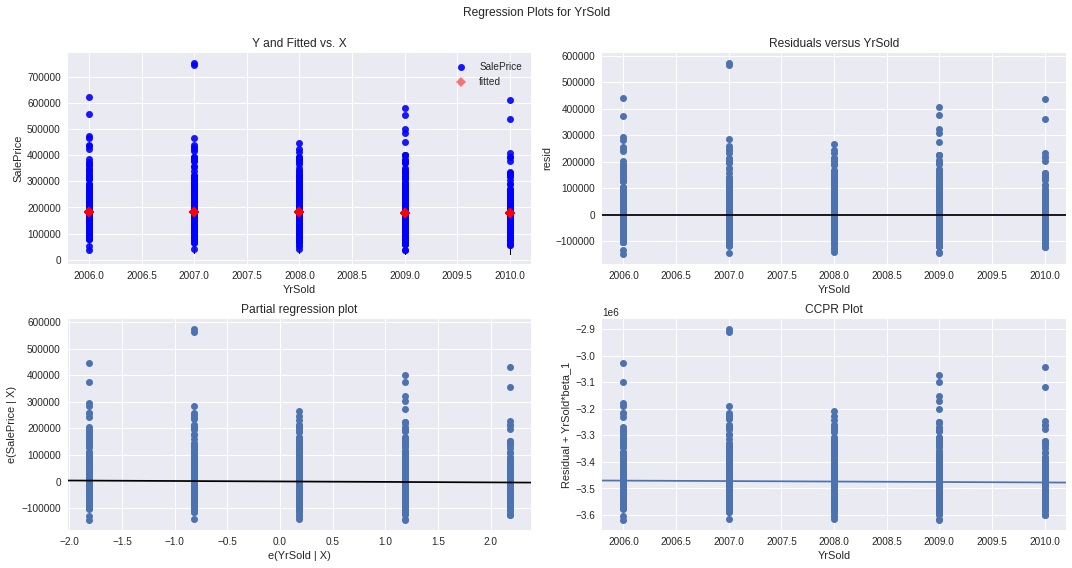

<Figure size 1080x576 with 0 Axes>

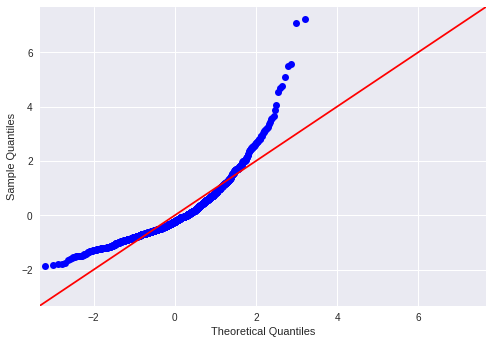

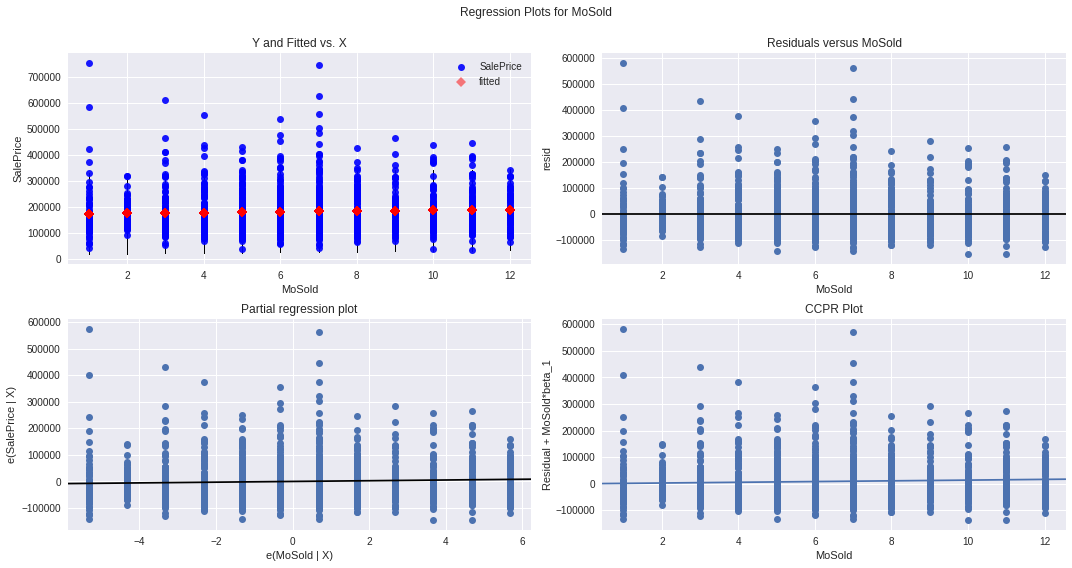

<Figure size 1080x576 with 0 Axes>

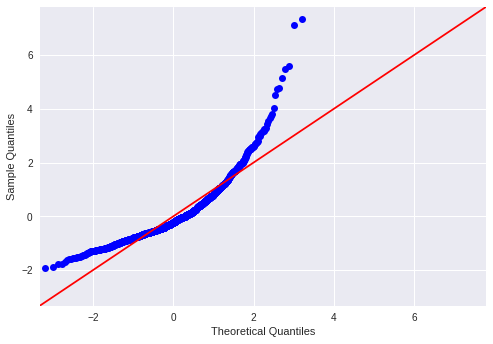

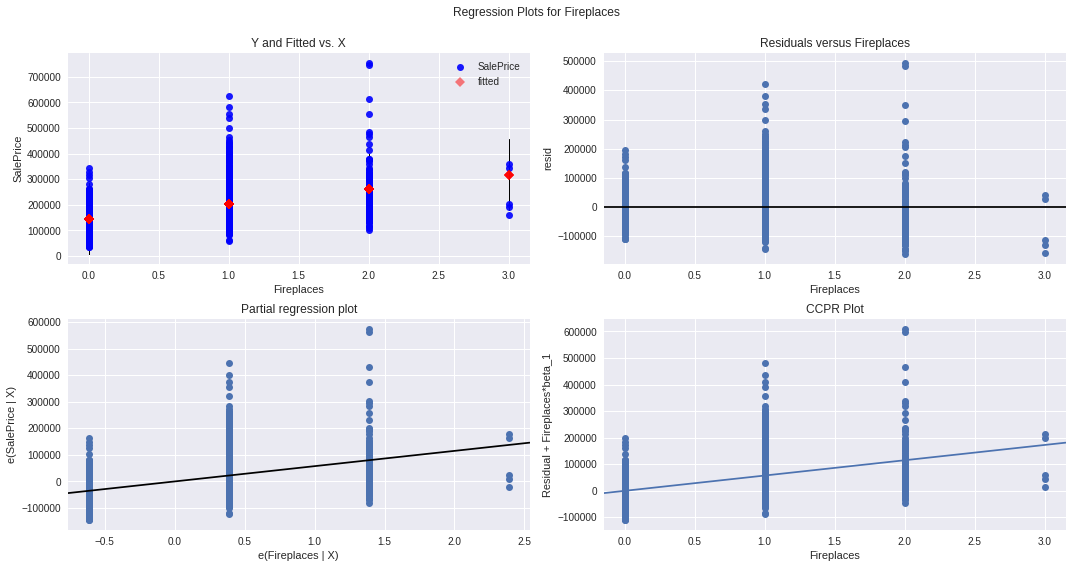

<Figure size 1080x576 with 0 Axes>

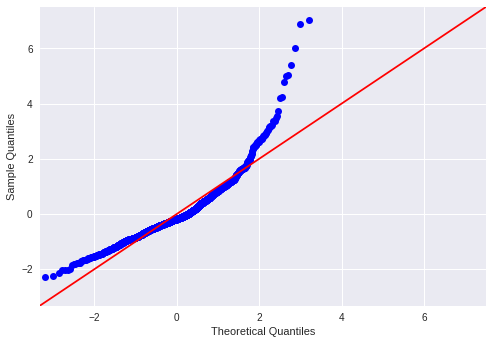

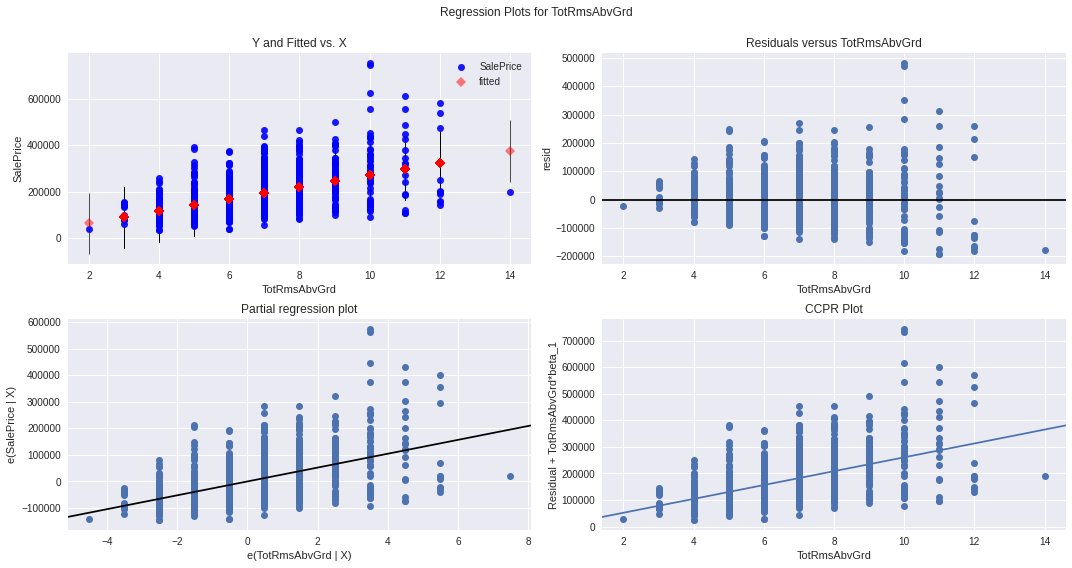

<Figure size 1080x576 with 0 Axes>

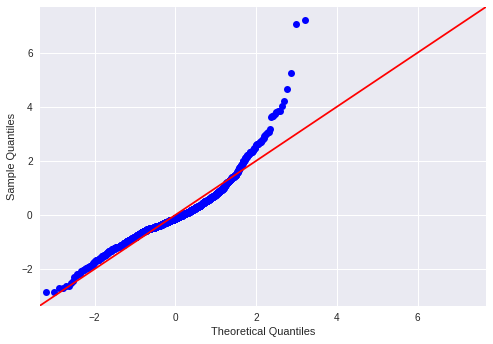

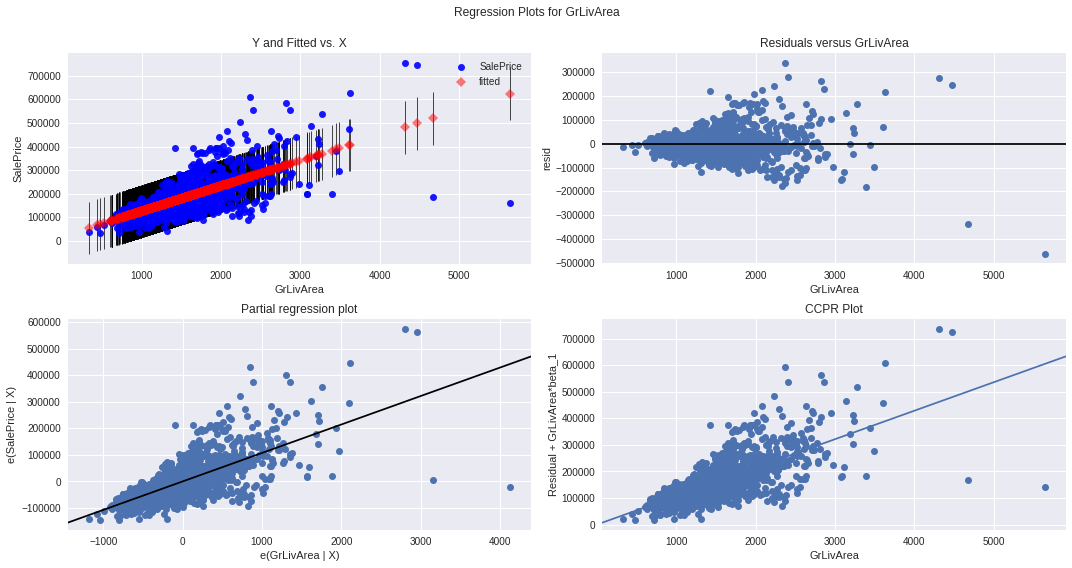

<Figure size 1080x576 with 0 Axes>

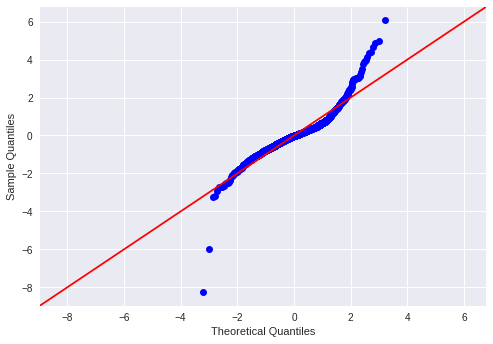

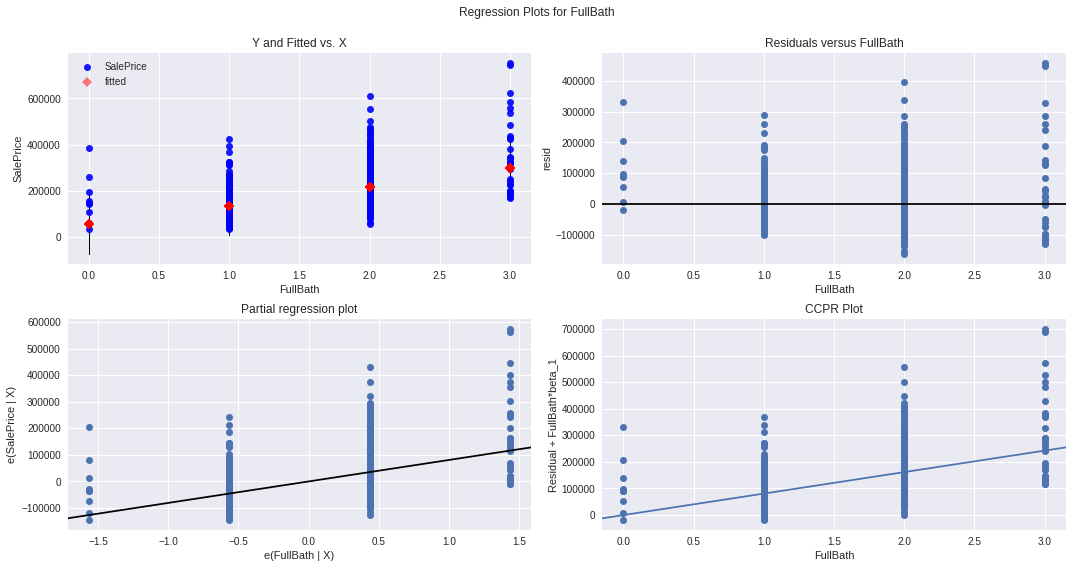

<Figure size 1080x576 with 0 Axes>

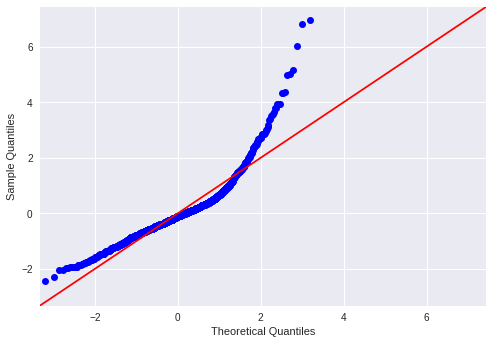

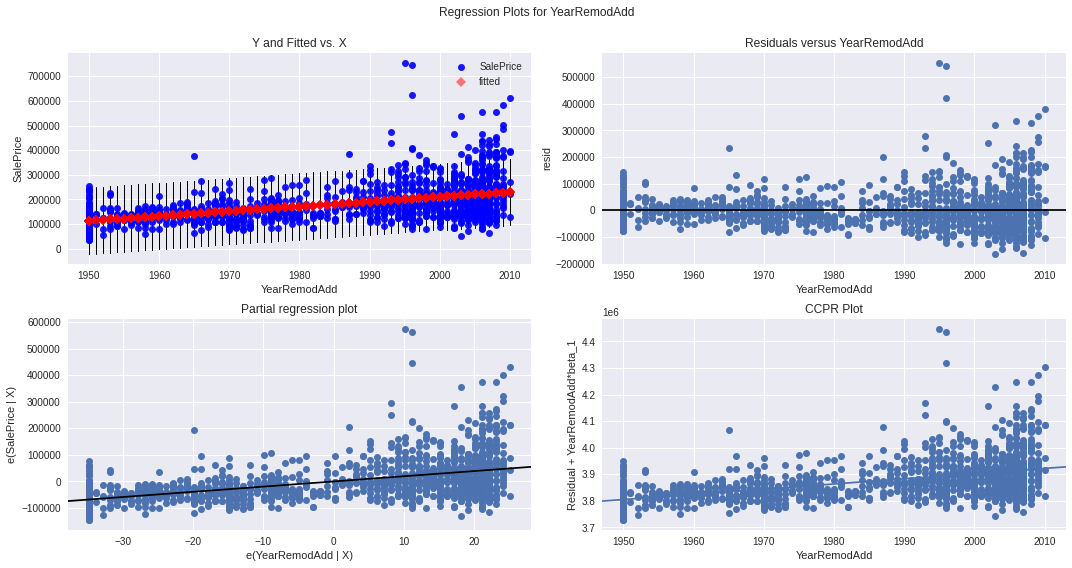

<Figure size 1080x576 with 0 Axes>

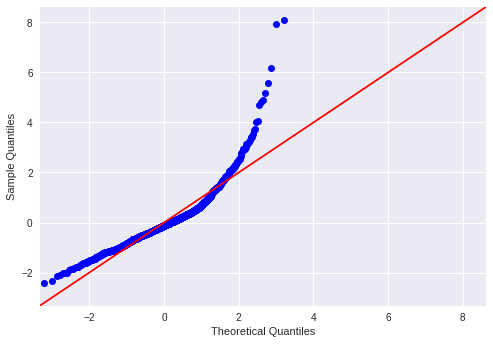

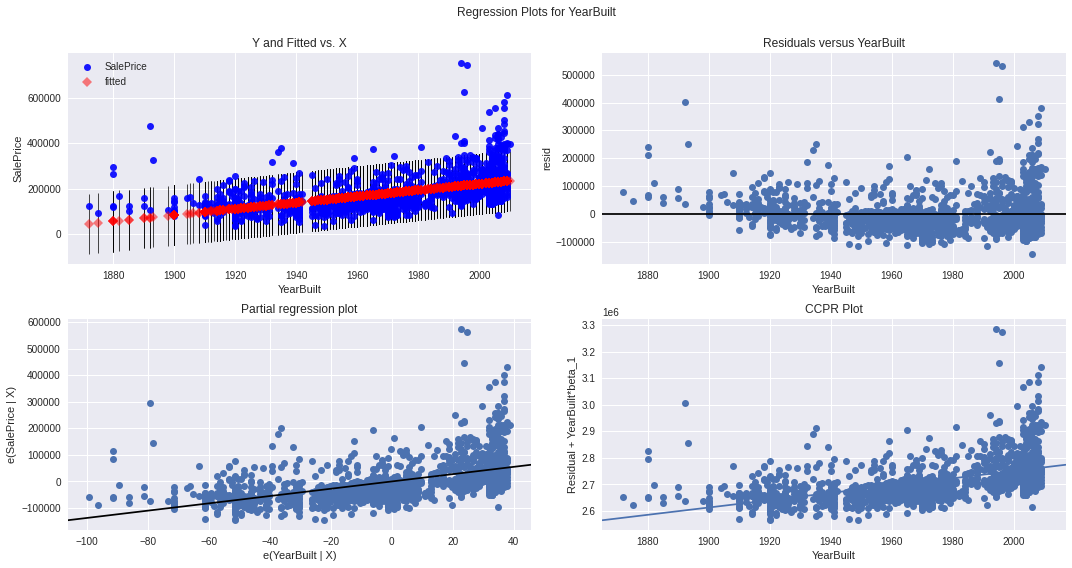

<Figure size 1080x576 with 0 Axes>

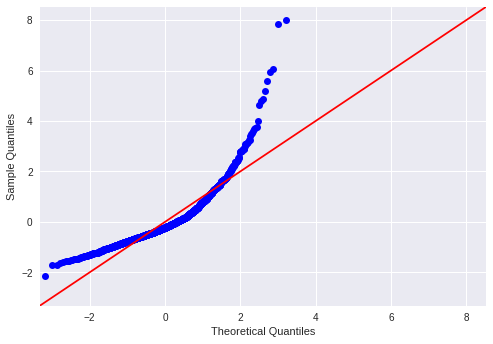

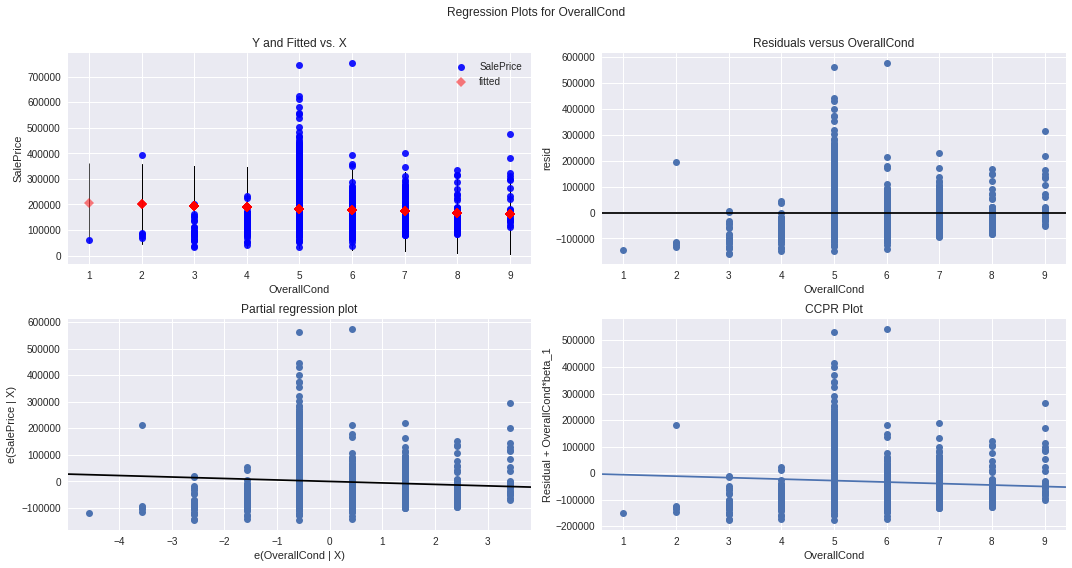

<Figure size 1080x576 with 0 Axes>

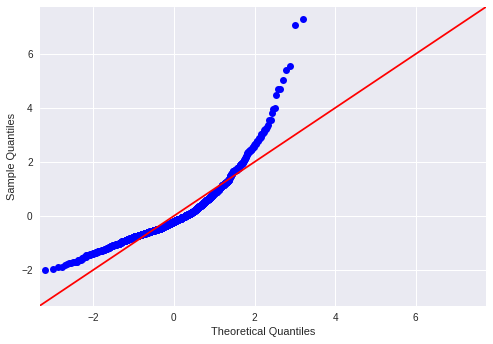

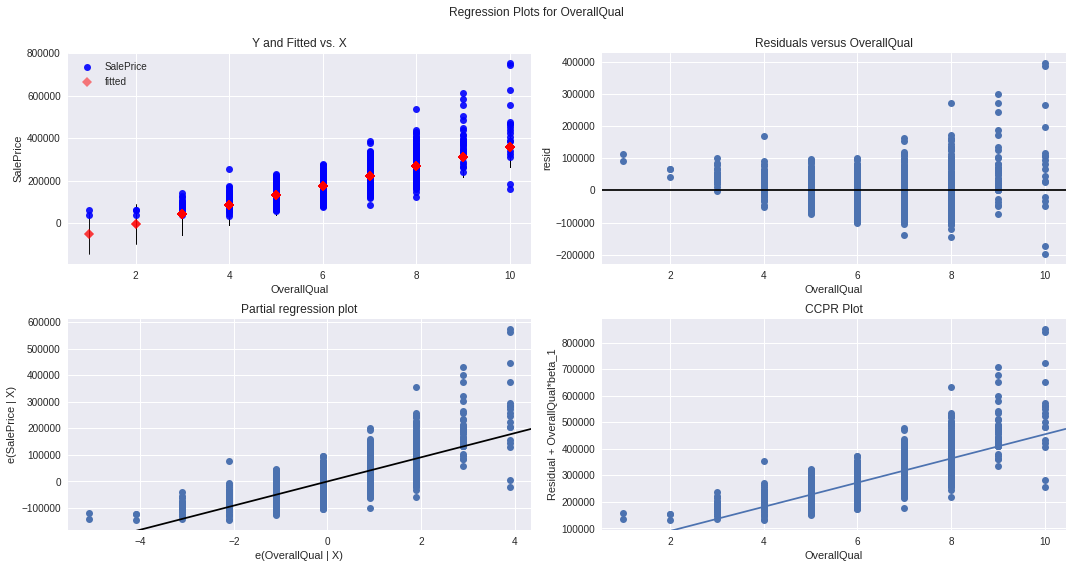

<Figure size 1080x576 with 0 Axes>

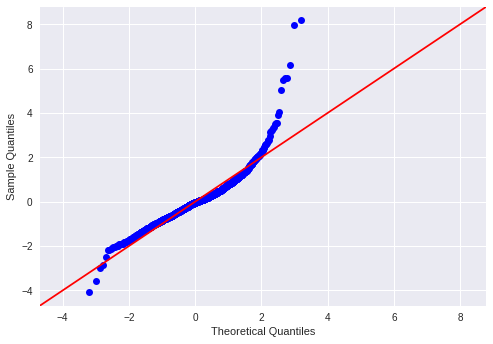

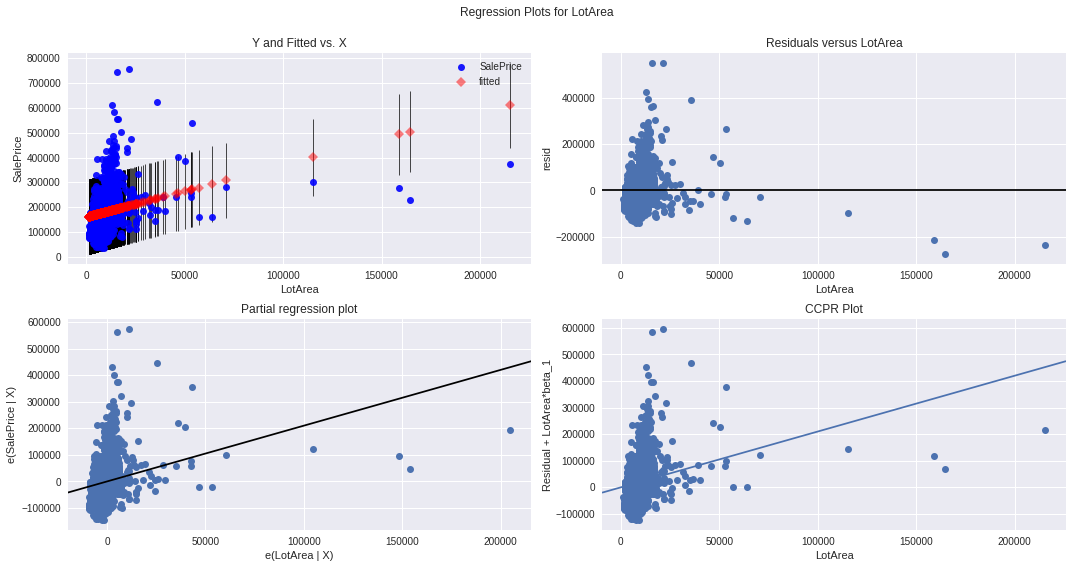

<Figure size 1080x576 with 0 Axes>

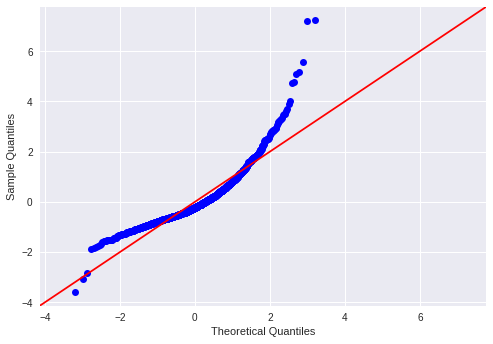

In [71]:
# Your code here
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import scipy.stats as stats

dep='SalePrice'
out = {}
show_summary=True
show_regplots = True
for col in data.columns:
    if col==dep:
        continue
    #regression formula
    f = '{}~{}'.format(dep, col)
    
    df=data[[col, dep]]

    #pass to OLS with fit method
    model = ols(formula=f, data=df).fit()

    if show_summary:
        display('Summary for {}-{}'.format(dep, col), model.summary())

    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    #plt.show()
    
    residuals = model.resid
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    #uncomment me####fig.show()

    name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
    test = sms.jarque_bera(model.resid)
    jb = list(zip(name, test))
    #print('jb:',jb)
    out[col]=[model.rsquared, model.params, model.pvalues, jb[0][1]]



In [72]:
out

{'YrSold': [0.0008365159328428406,
  Intercept    3.654560e+06
  YrSold      -1.730059e+03
  dtype: float64,
  Intercept    0.245272
  YrSold       0.269413
  dtype: float64,
  3432.7578051746077],
 'MoSold': [0.0021559533965250788,
  Intercept    172295.884154
  MoSold         1364.350502
  dtype: float64,
  Intercept    1.478780e-175
  MoSold        7.612758e-02
  dtype: float64,
  3588.2472305476103],
 'Fireplaces': [0.2180225385901352,
  Intercept     145648.490757
  Fireplaces     57539.831838
  dtype: float64,
  Intercept     0.000000e+00
  Fireplaces    6.141487e-80
  dtype: float64,
  3092.9933480406116],
 'TotRmsAbvGrd': [0.2848604068044379,
  Intercept       10896.471958
  TotRmsAbvGrd    26086.180847
  dtype: float64,
  Intercept        1.341981e-01
  TotRmsAbvGrd    2.772281e-108
  dtype: float64,
  2240.440265865941],
 'GrLivArea': [0.5021486502718042,
  Intercept    18569.025856
  GrLivArea      107.130359
  dtype: float64,
  Intercept     3.606554e-05
  GrLivArea    4.51

Clearly, the results are not very reliable. The best R-Squared is witnessed with `OverallQual`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Ames dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.